### Stock price prediction of test dataset 

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import load_model
import matplotlib.pyplot as plt

In [3]:
#'../ gives the relative paths'
model = load_model('../Models/Apple_model.h5')

In [4]:
test = pd.read_csv('../Data/test.csv')
train = pd.read_csv('../Data/train.csv')
test = pd.DataFrame(test.iloc[:,2:3].values)
train = pd.DataFrame(train.iloc[:,2:3].values)

In [5]:
dataset_total = pd.concat((train,test),axis=0)

In [6]:
dataset_total.shape

(10468, 1)

In [7]:
test.shape

(2093, 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values
inputs = scaler.fit_transform(inputs)

In [9]:
inputs.shape

(2153, 1)

In [10]:
X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])

In [11]:
X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [12]:
predicted_stock_price = model.predict(X_test)

66/66 [==============================] - 2s 13ms/step


In [13]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

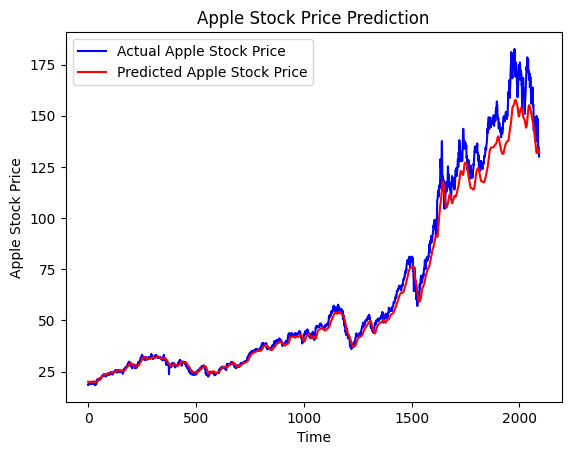

In [15]:
plt.plot(test, color = 'blue', label = 'Actual Apple Stock Price')
plt.plot (predicted_stock_price, color = 'red', label = 'Predicted Apple Stock Price') 
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel ('Apple Stock Price')
plt.legend ()
plt.show()

In [17]:
rmse = np.mean((test-predicted_stock_price)**2)
print(f'The test RMS error of the model was {rmse}')

The test RMS error of the model was 47.361281516558655
